In [1]:
# Import
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


In [2]:
# Load Data 
filename = 'C:\\Users\\deniz\\Desktop\\Thesis of ML for AutoPas\\Data\\Results\\example2.txt'
arr = np.genfromtxt(filename, delimiter=',')

In [12]:
# Slicing the data and checking out the shape
parameter_count = 9
print(arr[:,0:parameter_count].shape)
print(arr[:,0:parameter_count])
print(arr[:,parameter_count:].shape)
print(arr[:,parameter_count:])
print(np.argmin(arr[:,parameter_count:], 1).shape)
print(np.column_stack((arr[:,0:parameter_count], np.argmin(arr[:,parameter_count:], 1))))
print(np.column_stack((arr[:,0:parameter_count], np.argmin(arr[:,parameter_count:], 1))).shape)
print(np.column_stack((arr[:,0:parameter_count], np.argmin(arr[:,parameter_count:], 1))))
nptotal = np.column_stack((arr[:,0:parameter_count], np.argmin(arr[:,parameter_count:], 1)))
npfeatures = arr[:,0:parameter_count]
nplabels = np.argmin(arr[:,parameter_count:], 1)

(700, 9)
[[5.0e+00 2.0e-01 1.0e+00 ... 6.0e+00 2.0e+00 1.0e+03]
 [5.0e+00 2.0e-01 1.5e+00 ... 6.0e+00 2.0e+00 1.0e+03]
 [5.0e+00 2.0e-01 2.0e+00 ... 6.0e+00 2.0e+00 1.0e+03]
 ...
 [5.0e+00 2.0e-01 4.5e+00 ... 7.5e+01 2.0e+00 1.0e+03]
 [5.0e+00 2.0e-01 5.0e+00 ... 7.5e+01 2.0e+00 1.0e+03]
 [5.0e+00 2.0e-01 5.5e+00 ... 7.5e+01 2.0e+00 1.0e+03]]
(700, 27)
[[  148246.   352313.   346917. ...   532576.  3450878.   527973.]
 [  162172.   498808. 26964589. ...   941041.  3793659.   595741.]
 [  307314.   959034.   716776. ...  1931228.  4267302.   910469.]
 ...
 [ 5351442.  9166906. 14905408. ... 13160724.  7483338.  6406035.]
 [ 2493910.  7916634.  6071180. ... 13402674.  7752953.  5692631.]
 [ 2352048.  8220402.  6134818. ... 18819502.  5214517.  4831940.]]
(700,)
[[5.0e+00 2.0e-01 1.0e+00 ... 2.0e+00 1.0e+03 4.0e+00]
 [5.0e+00 2.0e-01 1.5e+00 ... 2.0e+00 1.0e+03 0.0e+00]
 [5.0e+00 2.0e-01 2.0e+00 ... 2.0e+00 1.0e+03 2.2e+01]
 ...
 [5.0e+00 2.0e-01 4.5e+00 ... 2.0e+00 1.0e+03 7.0e+00]
 [5.0

In [13]:
# Shuffle data and take 20% as test data
data = np.column_stack((arr[:,0:7], np.argmin(arr[:,7:], 1)))
print(data)
np.random.shuffle(data)
print(data.shape[0] / 5)

[[  5.    0.2   1.  ...  12.    6.    0. ]
 [  5.    0.2   1.5 ...  12.    6.    0. ]
 [  5.    0.2   2.  ...  12.    6.    0. ]
 ...
 [  5.    0.2   4.5 ... 150.   75.    0. ]
 [  5.    0.2   5.  ... 150.   75.    0. ]
 [  5.    0.2   5.5 ... 150.   75.    0. ]]
140.0


In [5]:
# Model
model = keras.Sequential([
    keras.layers.Dense(7, activation=tf.nn.relu),
    keras.layers.Dense(29, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Fun
model.fit(npfeatures, nplabels, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
700/700 [==============================] - 1s 1ms/sample - loss: nan - acc: 1.0000
Epoch 2/5
700/700 [==============================] - 0s 61us/sample - loss: nan - acc: 1.0000
Epoch 3/5
700/700 [==============================] - 0s 69us/sample - loss: nan - acc: 1.0000
Epoch 4/5
700/700 [==============================] - 0s 67us/sample - loss: nan - acc: 1.0000
Epoch 5/5
700/700 [==============================] - 0s 69us/sample - loss: nan - acc: 1.0000


In [7]:
test_loss, test_acc = model.evaluate(npfeatures, nplabels)

print('Test accuracy:', test_acc)

700/700 [==============================] - 0s 303us/sample - loss: nan - acc: 1.0000
Test accuracy: 1.0


In [8]:
predictions = model.predict(npfeatures)
print(predictions[0])
print(np.max(predictions[0]))
print(nplabels[0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
nan
0


In [9]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

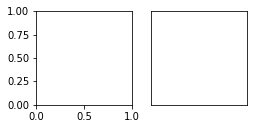

In [10]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, nplabels)
plt.show()